DATASET BAN ĐẦU -> GIẢM CHIỀU

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('../clean.csv')

In [3]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.515644,0.030986,0.708890,85.232557,2017.820427,7.423653,15.596995,3.552447,0.025637,0.023349,0.153411,103.423539,0.619655,0.672364
std,0.518715,0.402648,0.870644,1.410905,1.048131,0.173281,1.399851,85.930817,0.383836,3.069894,8.740447,0.681536,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,3.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,4.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,4.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


Phân loại các đặc trưng và biến mục tiêu

In [5]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

Chuẩn hóa dữ liệu

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Giảm chiều với PCA

In [7]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

* Gộp lại thành DataFrame với cột booking_status

In [8]:
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['booking_status'] = y.values

In [9]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,booking_status
0,-1.256790,-1.523165,-1.873354,1.132156,0.531910,-1.068754,-0.631228,0.224895,0.319558,-0.877885,-0.291762,0.617230,1.123527,-0.262262,0.424917,1
1,0.675943,-0.512917,0.772726,-0.348828,2.269720,0.343788,-1.531018,-0.301709,-0.689208,-0.867273,0.223345,-1.226787,-0.372775,0.372522,-0.462910,1
2,-0.986511,-0.516857,1.583183,-0.437614,-1.361870,2.440143,-0.036583,-0.067734,-0.191612,-0.295945,-0.670627,1.020077,-0.655138,-0.195129,0.668014,0
3,0.037120,-0.711944,0.871477,0.497386,-0.730057,-1.031433,1.090281,-0.148144,0.148808,0.267013,0.151021,0.811643,0.101113,-0.697189,0.212549,0
4,-0.085300,-0.766721,2.076250,-1.355237,0.473652,-0.143242,-0.675026,-0.600774,-0.014370,-1.230543,0.378031,-0.352698,0.498974,-0.153126,0.188552,0


Lưu dataset mới

In [10]:
df_pca.to_csv('../DatasetDR.csv', index=False)
print("Đã lưu file 'DatasetDR.csv' sau khi giảm chiều với PCA.")

Đã lưu file 'DatasetDR.csv' sau khi giảm chiều với PCA.


Trực quan hóa dữ liệu sau PCA

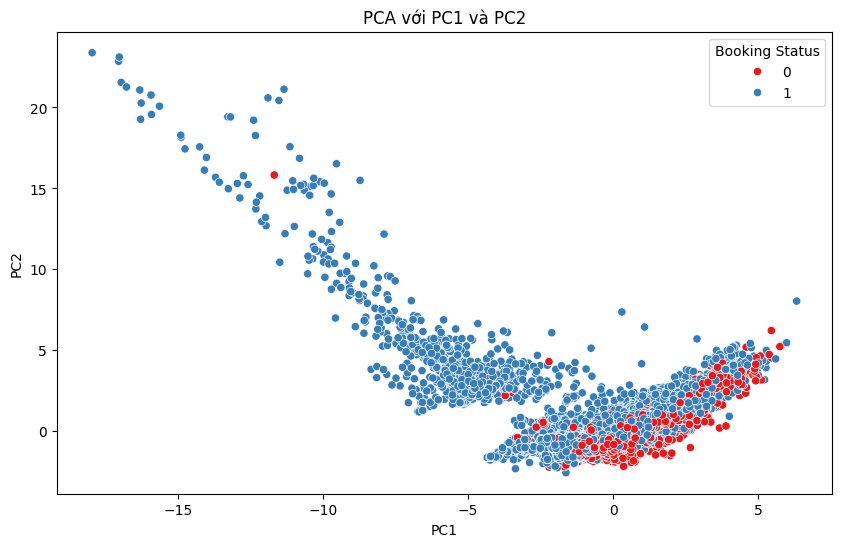

In [ ]:
df_loaded = pd.read_csv('../DatasetDR.csv')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_loaded, x='PC1', y='PC2', hue='booking_status', palette='Set1')
plt.title('PCA với PC1 và PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Booking Status')
plt.show()